<a href="https://colab.research.google.com/github/karad1818/Python_Project/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Notes** :
 
* Colab uses BGR as it's image format so always convert BGR2RGB 


**Convolution**

https://youtu.be/8rrHTtUzyZA

**Application of Morphological Operations in MRI image :**



![](https://drive.google.com/uc?export=view&id=1qizMJpFxJfQM3Vu2Wkea346TwPHsruHt)

In [1]:
import cv2 as cv
import numpy as np  # for creating  kernel
from matplotlib import pyplot as draw   #showing the images

In [3]:
def draw_two(x,y,ok=0):
  fig = draw.figure()
  fig.add_subplot(1,2,1)
  draw.imshow(x,cmap = 'gray' if ok else None)
  fig.add_subplot(1,2,2)
  draw.imshow(y,cmap = 'gray' if ok else None)

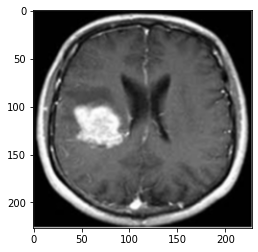

In [4]:
img = cv.imread("/content/drive/MyDrive/Digital_image_processing/Tumor1.PNG")
draw.imshow(img)

In [5]:
#create a kernel
# kernel = np.ones((3,3),dtype=int)
kernel = cv.getStructuringElement(cv.MORPH_CROSS,(3,3))
kernel

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

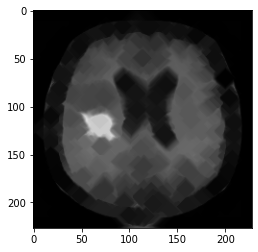

In [6]:
#erasion
# if all 1 matches with all 1 then 1 it's like & between kernel and image
erode = cv.erode(img,kernel,iterations=8);
draw.imshow(erode)

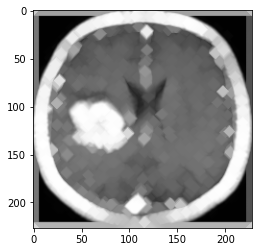

In [7]:
#dilation
#if any of the 1 matches so it's like or | between image and kernel
dilation = cv.dilate(img,kernel,iterations=5)
draw.imshow(dilation)

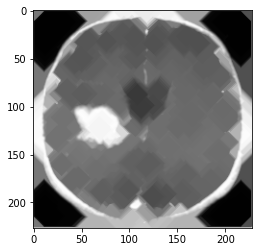

In [8]:
#closing
#first dilation then erasion
close = cv.morphologyEx(img,cv.MORPH_CLOSE,kernel,iterations=10)
draw.imshow(close)

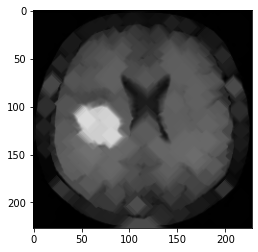

In [9]:
#opening
#first erasion then dilation
open = cv.morphologyEx(img,cv.MORPH_OPEN,kernel,iterations=8)
draw.imshow(open)

#Why we are not uses a gaussian kernel ??

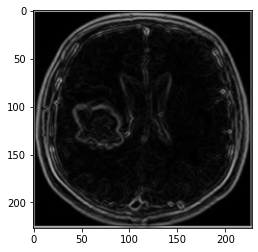

In [10]:
#Gradient
#dilation-erasion
grad = cv.morphologyEx(img,cv.MORPH_GRADIENT,kernel,iterations=1)
draw.imshow(grad)

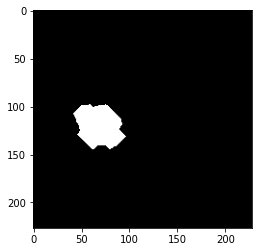

In [11]:
#Segmentation using thresholding

threshold_value , threshold_image = cv.threshold(open,120,255,cv.THRESH_BINARY)
draw.imshow(threshold_image)


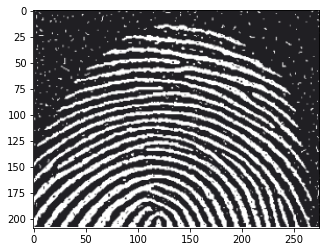

In [12]:
#Another example of morphology
finger = cv.imread("/content/drive/MyDrive/Digital_image_processing/Finger1.PNG");
draw.imshow(finger)

In [13]:
#create Kernel
k = np.ones((2,2),dtype=int)

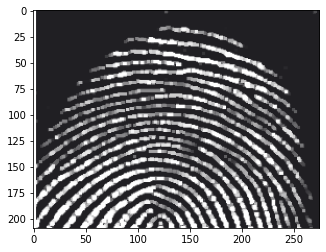

In [14]:
#erasion
erode = cv.erode(finger,k,iterations=2);
# draw.imshow(erode)
dilate = cv.dilate(erode,k,iterations=2);
draw.imshow(dilate)
# open = cv.morphologyEx(finger,cv.MORPH_OPEN,kernel,iterations=1)
# draw.imshow(open)

Lower Sample rate ---> Blockiness

Lower number of level (Quantization)  ---> False Contouring


**Demosaicing / Debayering :**

Color filter array to digital image (Bayer structure to digital for more info visit : wikipedia)


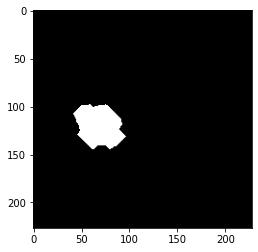

In [15]:
image = cv.imread("/content/drive/MyDrive/Digital_image_processing/rahulkv.png");
im = cv.cvtColor(image,cv.COLOR_RGB2GRAY)
draw.imshow(im)
a,b,c = threshold_image.shape
x = [0.2125,0.7154,0.0721]  
# These weights are used by CRT phosphors as they better represent human perception of red, green and blue than equal weights
im = []
for i in range(0,a,1):
  temp = []
  for j in range(0,b,1):
    xt = 0.0
    for k in range(0,c,1):
      xt += threshold_image[i][j][k]*x[k]
    temp.append(xt)
  im.append(temp)
draw.imshow(im,cmap='gray')

**HistoGram :**

***h(d)*** = # no. of pixel in image that have the intensity value d.

slop for contrast stretching

***M(p)*** = (255/(High-Low)) * (p-low)



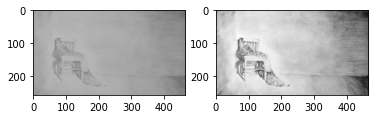

In [16]:
# draw.imshow(img)
# im = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
# img.ravel() --> flatten the matrix into row vector
# draw.hist(im.ravel(),256,[0,256])
# draw.show()

# negative image
# draw.imshow(255-img)

#contrast Stretching :
# so idea is to extends the boundary limit of color 

l_img = cv.imread("/content/drive/MyDrive/Digital_image_processing/low_contrast.PNG");
# draw.hist(l_img.ravel(),256,[0,256])
# draw.show()

mn = min(l_img.ravel())
mx = max(l_img.ravel())

#contrast stretching

new_img = (255/(mx-mn)) * (l_img-mn)

# draw.hist(new_img.ravel(),256,[0,256])
# draw.show()
new_img = new_img.astype(int)
draw_two(l_img,new_img,1)

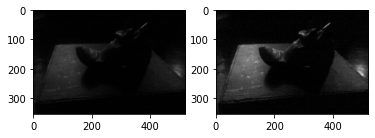

In [17]:
#Again contrast stretching but with more black image
b_img = cv.imread("/content/drive/MyDrive/Digital_image_processing/low_contrast_b.PNG");

mn1 = min(b_img.ravel())
mx1 = max(b_img.ravel())

new_b_img = (255/(mx1-mn1)) * (b_img - mn1)
new_b_img = new_b_img.astype(int)
draw_two(b_img,new_b_img,1)

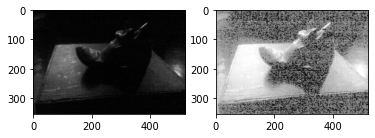

In [18]:
#Histogram equalization :
eq_img = cv.imread("/content/drive/MyDrive/Digital_image_processing/low_contrast_b.PNG")
eq_img = cv.cvtColor(eq_img,cv.COLOR_RGB2GRAY);
e_img = cv.equalizeHist(eq_img)
draw_two(eq_img,e_img,1)

In [19]:
# Gamma Correction:
# Every Display devices has a different non-linear relationship between pixel input 
# and display output luminance.
# relationship for devices modeled as power function
# F(D) = D^gamma

# solution is if we know the gamma then we send intensity like : D^(1/gamma) so after that 
# we'll get correct values on output screen.

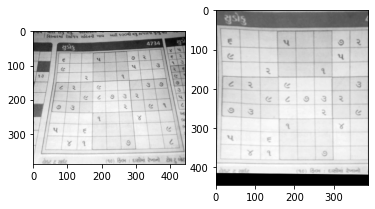

In [20]:
# Geometric Operations :

# 1. Rotation :

c = cv.imread("/content/drive/MyDrive/Digital_image_processing/written.png")
row,col,color = c.shape
# print(str(row)+" "+str(col)+" "+str(color))
matrix = cv.getRotationMatrix2D(((row-1)/2,(col-1)/2),45,1)
rotated_img = cv.warpAffine(c,matrix,(row,col))
# draw_two(c,rotated_img)

# 2. Affine Transformation :

start_point = np.float32([[0,0],[5,30],[10,10]]);
end_point = np.float32([[10,20],[15,40],[20,20]]);

mat = cv.getAffineTransform(start_point,end_point);
transformed_img = cv.warpAffine(c,mat,(row,col))
# draw_two(c,transformed_img)

# 3. perspective transforamation :

sudoku = cv.imread("/content/drive/MyDrive/Digital_image_processing/sudoku.PNG")
sudoku = cv.cvtColor(sudoku,cv.COLOR_BGR2GRAY)
row,col = sudoku.shape
start_point = np.float32([[72,35],[373,21],[440,349],[24,356]]);
end_point = np.float32([[0,0],[443,0],[443,387],[0,387]]);

matrix = cv.getPerspectiveTransform(start_point,end_point)

f_sudoku = cv.warpPerspective(sudoku,matrix,(row,col))
draw_two(sudoku,f_sudoku,1)

# 4. Scalling :

scal_img = cv.resize(c,None,fx=2,fy=2,interpolation=cv.INTER_LINEAR) # bilinear interpolation
# draw_two(c,scal_img)

**Convolution**  **:** 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


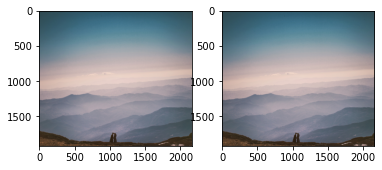

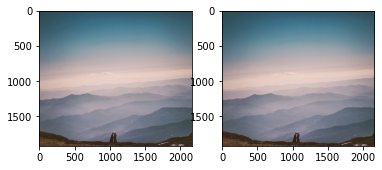

In [21]:
# spatial filter :
cat = cv.imread("/content/drive/MyDrive/Digital_image_processing/written.png");
high = cv.imread("/content/drive/MyDrive/Digital_image_processing/high.jpg");
high = cv.cvtColor(high,cv.COLOR_BGR2RGB)
# 1. smoothing filter (Low-Pass filter/Moving average filter) :
# idea : replace each pixel with weighted average of it's neighbour
# Pros : remove/reduces noise
# cons : blur the image , removes the detail
# example : 

ker = np.ones((5,5),dtype=float)/25 # weighted average
cat_2 = cv.filter2D(cat,-1,ker)  # ddepth = what kind of data stored in output image if we write -1 means data would be same as input data
# draw_two(cat,cat_2)

cat_3 = cv.blur(cat,(5,5))
# draw_two(cat,cat_3)

# gaussian_kernel = cv.getGaussianKernel(5,0,cv.CV_64F)
# print(gaussian_kernel);
cat_4 = cv.GaussianBlur(cat,(3,3),0) # 3rd parameter is standard deviation 
# draw_two(cat,cat_4)

# sharpening filter :
# what we want is that if there is a differnce between 2 pixel is high then there is edge 
# pixel = f(x+1,y)+f(x-1,y)+f(x,y+1)+f(x,y-1)-4*f(x,y)
filt = np.array([[0,1,0],[1,-4,1],[0,1,0]]);

cat_5 = cv.filter2D(cat,-1,filt)
# draw_two(cat,cat_5)

# but how to enhance(sharpen) the edges :

# new_filter = img - filter
new_filter = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
n_high = cv.filter2D(high,-1,new_filter)
draw_two(high,n_high)

# here noise is also going to sharpen
# so for that we can use unsharp masking 
# ex.
# original image f ,low-pass image f',high-pass image fh = f - f'
# here unsharp image = f + k * fh
original_filter = np.array([[0,0,0],[0,1,0],[0,0,0]])
low_filter = np.ones((3,3),dtype=float)/9
high_filter = original_filter - low_filter
k = 0.5
unsharp = high + k * cv.filter2D(high,-1,high_filter)
un= unsharp.astype(int)
draw_two(high,un)

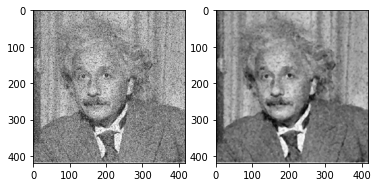

In [22]:
# Not all image filters are linear
# median filter :
# useful for solt and pepper noise 
img = cv.imread("/content/drive/MyDrive/Digital_image_processing/sandp.PNG")
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# draw.imshow(cv.filter2D(img,-1,np.ones((10,10),dtype=float)/100),cmap='gray')
# so here simple low pass filter will not work
med_img = cv.medianBlur(img,5)
draw_two(img,med_img,1)

# Notes : Gaussian noise --> low-pass filter
#         salt-pepper noise/impulsive noise --> median filter

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


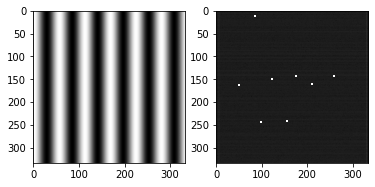

In [23]:
# frequency domain :
# do later on
#convert sin(x) image into fourier image

sin = cv.imread("/content/drive/MyDrive/Digital_image_processing/sin.PNG");
sin = cv.cvtColor(sin,cv.COLOR_BGR2GRAY)
f = np.fft.fft2(sin)
# f = np.fft.fftshift(f)
magnitude = np.log(np.abs(f)) # magnitude = np.abs --> sqrt(a^2+b^2)  if a+bi
draw_two(sin,magnitude,1)
# draw.imshow(sin,cmap='gray')

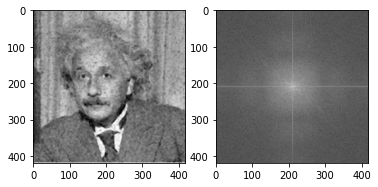

In [24]:
# dot = cv.imread("/content/drive/MyDrive/Digital_image_processing/dot.png");
# dot = cv.cvtColor(med_img,cv.COLOR_BGR2GRAY)

fd = np.fft.fft2(med_img)
fd = np.fft.fftshift(fd)
m = np.log(np.abs(fd))

draw_two(med_img,m,1)

![](https://drive.google.com/uc?export=view&id=1m4NfbZIDyIuXQmC4kWzyDdLCQF8qzdvP)

But in the case of real image there is noise so idea is to first do law pass filtering then find the edge 

So basically edge detection is related to Gradient of the image (derivative)

$\nabla$ F = grad F


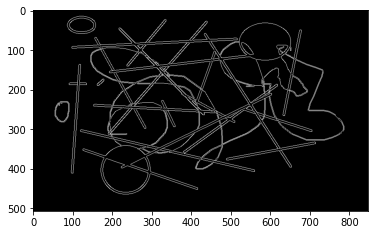

In [25]:
# Edge detection :
# let's find horizontal edges :
# sobel filter :
# [[-1,-2,-1],[0,0,0],[1,2,1]]
# Laplacian / Mexican hat / Marr hildreth:
# [[0,-1,0],[-1,4,-1],[0,-1,0]]
# vertical edges
hy = np.array([[-1,0,1]]) # try [-1,1]  [-2,-1,0,1,2]
# horizontal edges
hx = np.array([[-1],[0],[1]])
edge = cv.imread("/content/drive/MyDrive/Digital_image_processing/edge.PNG")
edge = cv.cvtColor(edge,cv.COLOR_BGR2RGB);
hx = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
hy = hx.transpose();
magnitude = np.sqrt(np.square(hx)+np.square(hy))
detect = cv.filter2D(edge,-1,magnitude)
# draw_two(edge,detect)
draw.imshow(detect)

# Let's use builtin

sobel = cv.Sobel(edge,-1,1,1,ksize=5)
# draw.imshow(sobel)

laplassian = cv.Laplacian(edge,-1,ksize=3)
# draw_two(sobel,laplassian)

# canny edge detection algo :
canny = cv.Canny(cv.cvtColor(edge,cv.COLOR_RGB2GRAY),0,255)
draw.imshow(canny,cmap='gray')

In [26]:
# edge linking :

# IDEA :
# we'll make a small window to the point (x,y) called as Sxy
# for (s,t) in Sxy "link" (x,y) to (s,t) iff abs(M(x,y)-M(s,t))<=Th1 and abs(aplha(x,y)-aplha(s,t))<=Th2
# M(x,y) = Magnitude of that pixel
# aplha(x,y) = Angle

# boundary following :
# Moore's boundary following algorithm :

# Edge Map : 1 (Edge pixel) ,0 (Not edge)
# Algorithm :
# Let b0 be the left-most and uppermost points labeled as 1
# Let c0 be the left-neighbour of b0 
# and now examine 8-neighbour of b0 staring from c0 and going clockwise let b1 be the first 1 and c1 be the preceddnig 0
# REPEAT with updating b and c
# continue untill b=b0 AND next boundary point found is b1

# once we have boudary we can describe it with direction code(clockwise) : N = 0, NE = 1 ,....

![](https://drive.google.com/uc?export=view&id=13zdXuKdNUREqKR34ukFNDINngIDvvS2d)

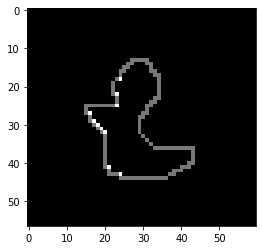

In [27]:
# Algorithm : 
from time import sleep
from IPython.display import clear_output
img = cv.imread("/content/drive/MyDrive/Digital_image_processing/trace3.PNG")
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
row,col = img.shape
white,black,red = 255,0,120
sx,sy = -1,-1
for i in range(0,row,1):
  for j in range(0,col,1):
    if img[i][j] == white:
      sx=i
      sy=j
      break
    if sx!=-1:
      break

dx = [0,-1,-1,-1,0,1,1,1]
dy = [-1,-1,0,1,1,1,0,-1]

curr_x,curr_y = sx,sy
while True:
  img[curr_x][curr_y] = red
  clear_output();
  draw.imshow(img,cmap='gray')
  draw.show()
  sleep(1)
  ok = 0;
  for i in range(0,8,1):
    new_x = curr_x + dx[i]
    new_y = curr_y + dy[i]
    if new_x < 0 or new_y < 0 or new_x > row or new_y > col:
      continue
    if img[new_x][new_y] == white :
      curr_x = new_x
      curr_y = new_y
      ok = 1
      break;
  if curr_x == sx and curr_y == sy:
    break
  if ok == 0:
    break;

In [28]:
# the Hough transform :

# IDEA :

# (r,theta) = x*cos(theta) + y*sin(theta) = r
# detect edge points first --> binary image
# divide points into (r,theta) plane
# for each edge point increment corresponding (r,theta) by 1
# look for (r,theta) cell with highest count
# select highest peak
# now map (r,theta) into (x,y) plane


![](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/houghlinesdemo.gif)

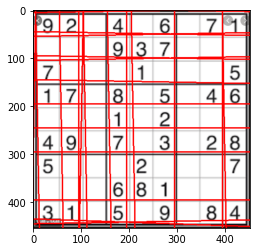

In [29]:
# Create a function for Hough transform :
def Hough(img):
  c_img = img
  img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
  # 1. edge detection:
  edge = cv.Canny(img,0,200)
  # edge = cv.Sobel(img,-1,1,1,ksize=3)
  # draw.imshow(edge,cmap='gray')
  # print(edge.shape)
  # 2. Hough Lines :
  hough = cv.HoughLines(edge,10,np.pi/180,820) # it's all about threshold value 
  # x*cos(theta) + y*sin(theta) = r
  cnt = 0
  if hough is not None:
    for i in range(0,len(hough)):
      r = hough[i][0][0]
      theta = hough[i][0][1]
      x0 = r*np.cos(theta)
      y0 = r*np.sin(theta)
      x1 = int(x0 - 1000*np.sin(theta))
      y1 = int(y0 + 1000*np.cos(theta))
      x2 = int(x0 + 1000*np.sin(theta))
      y2 = int(y0 - 1000*np.cos(theta))
      cnt += 1
      cv.line(c_img,(x1,y1),(x2,y2),(255,0,0),2)  
    # print(cnt)
  draw.imshow(c_img)
image = cv.imread("/content/drive/MyDrive/Digital_image_processing/sudoku_o.PNG");
Hough(image)


In [ ]:
# Image segmentation :

# Thresholding :

# g(x,y) = { 1 ; I(x,y) > thre.  // object
#          { 0 ; I(x,y) <= thre. // background

# sometimes global thresholding won't work so we'll use local threshold that compare with neighbours and do segmentation

In [ ]:
th = cv.imread("/content/drive/MyDrive/Digital_image_processing/thre.jpg");
thre = cv.cvtColor(th,cv.COLOR_BGR2GRAY)
# draw.imshow(thre,cmap='gray')

val, ix = cv.threshold(thre,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
iy = thre > 50;
draw_two(iy,ix,1)
print(val)

# for global thresholding : how to find a best(optimal) threshold ?

# Otsu's algorithm :

# IDEA : maximize between two class variance means a good threshold should separate pixels into tight clusters.

# (sigma b)^2 should be maximize

# when otsu will fail ? --> if there is no strong peaks in histogram or object is too small

# solution for that :
# 1. apply low-pass filter then use otsu
# 2. instead of considering all pixel for counting threshold use only neighbour one

![](https://i.ibb.co/TTyjCkp/otsu.png)

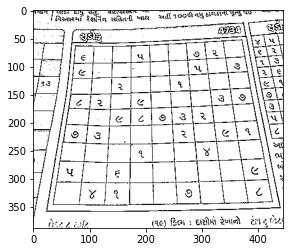

In [74]:
# variable /Adaptive thresholding :
sd = cv.imread("/content/drive/MyDrive/Digital_image_processing/sudoku.PNG")
sd1 = cv.cvtColor(sd,cv.COLOR_BGR2GRAY)
sd1 = cv.adaptiveThreshold(sd1,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,3,3) 
# last two arguments are : block size&1 , c(values that is going to be subtracted from mean)
draw.imshow(sd1,cmap='gray')


In [ ]:
# Image Compression :

# 1. Lossless
# 2. Lossy 

# to measure compression ration : #bits before / #bits after

# for real images compression ration : 2-10
